In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVR, SVR, SVC,LinearSVC
from sklearn.datasets import make_regression
from sklearn.preprocessing import normalize 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

np.set_printoptions(suppress=True, linewidth=120, precision=2)

In [2]:
# Read in data
df_training_features = pd.read_csv('train_features.csv')
df_training_labels = pd.read_csv('train_labels.csv')
all_pids = [pid for pid in df_training_features['pid'].unique()]

In [5]:
global np_data
global measurements_list
global tests_list

measurements_list = list(df_training_features.columns.values)
tests_list = list(df_training_labels.columns.values)[1:12]

print(len(all_pids))

np_data = np.zeros((len(all_pids), len(measurements_list), len(tests_list)+1), dtype=float)

for pid_i, pid in enumerate(all_pids):
    if pid_i % 1000 == 0:
        print(round(pid_i/len(all_pids),2)*100, '%')
    
    np_data[pid_i,0,0] = pid
    
    # filter for respective patient id
    pid_df_training_features = df_training_features[df_training_features['pid']==pid]
    pid_df_training_labels = df_training_labels[df_training_labels['pid']==pid] #.replace(0, np.nan, inplace=True)
    
    # count measurements or calc trend or whatever
    pid_df_training_features_count = pid_df_training_features.count()
    
    for test_i, test_name in enumerate(tests_list):
        for measurement_i, measurement_name in enumerate(measurements_list):
            # if --> eg. any or min 2
            if pid_df_training_features_count[measurement_name] >= 2 and pid_df_training_labels[test_name].item() == 1:
                np_data[pid_i, measurement_i, test_i+1] = 1
            
    #print(np_data)

print('completed')

18995
0.0 %
5.0 %
11.0 %
16.0 %
21.0 %
26.0 %
32.0 %
37.0 %
42.0 %
47.0 %
53.0 %
57.99999999999999 %
63.0 %
68.0 %
74.0 %
79.0 %
84.0 %
89.0 %
95.0 %
completed


In [6]:
print(np_data[21,:,:])

[[10024.     1.     1.     1.     1.     1.     1.     0.     1.     0.     0.     0.]
 [    0.     1.     1.     1.     1.     1.     1.     0.     1.     0.     0.     0.]
 [    0.     1.     1.     1.     1.     1.     1.     0.     1.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     1.     1.     1.     1.     1.     1.     0.     1.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     1.     1.     1.     1.     1.     1.     0.     1.     0.     0.     0.]
 [    0.     1.     1.     1.     1.     1.

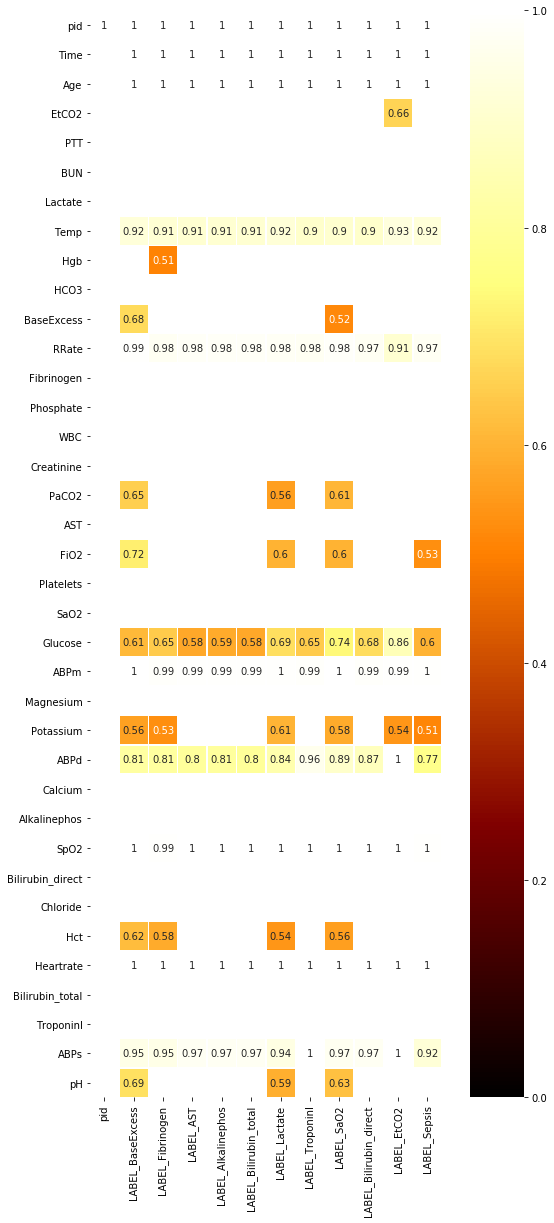

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis
pid,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Time,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EtCO2,0.0,0.008242,0.094286,0.081028,0.082906,0.081182,0.114383,0.127177,0.091237,0.150621,0.664274,0.116728
PTT,0.0,0.229003,0.323571,0.123847,0.122799,0.123851,0.207994,0.048549,0.197567,0.181677,0.070973,0.162684
BUN,0.0,0.374411,0.385714,0.281072,0.281034,0.280525,0.384170,0.189446,0.317639,0.336957,0.243222,0.357537
Lactate,0.0,0.277080,0.309286,0.171498,0.174504,0.171554,0.410202,0.072823,0.281370,0.234472,0.304625,0.299632
Temp,0.0,0.922488,0.910714,0.909091,0.909739,0.908753,0.920063,0.896570,0.904934,0.895963,0.929825,0.922794
Hgb,0.0,0.474882,0.507143,0.304567,0.304212,0.303720,0.456219,0.226385,0.444019,0.381988,0.335726,0.387868
HCO3,0.0,0.368132,0.290000,0.178305,0.175618,0.176805,0.312648,0.032190,0.252760,0.194099,0.041467,0.284926


In [10]:
np_data_mean = np_data.mean(axis=0)

np_data_mean_normed = np_data_mean / np_data_mean.max(axis=0)

plt.figure(figsize=(10,20))
ax = sns.heatmap(np_data_mean_normed, mask=np_data_mean_normed<0.5, cmap='afmhot', linewidth=0.5, square=True, annot=True, yticklabels=measurements_list, xticklabels=['pid']+tests_list)

plt.show()




df_data = pd.DataFrame(np_data_mean_normed, index=measurements_list, columns=['pid']+tests_list)
df_data